<a href="https://colab.research.google.com/github/uprestel/Segmentation/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation Project

In [1]:
#!git clone https://github.com/uprestel/Segmentation
#%cd Segmentation/

In [2]:
#%cd data
#%cd ..
#!ls

path  /home/user/Documents/Uni/Universität-Heidelberg/Semester-12/Image-Processing/Project/Segmentation


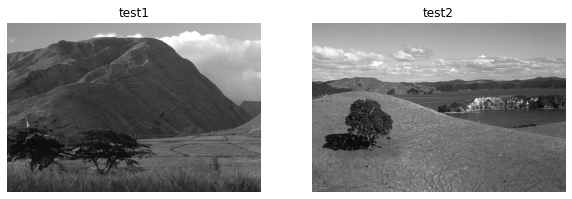

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_images_grayscale(paths):
    images = []
    for path in paths:
        img = Image.open(path).convert('L')
        images.append(img)
    return images    

def plot(images, titles, figsize=(10,5)):
    n_images = len(images)
    
    fig = plt.figure(figsize=figsize)
    
    for i in range(n_images):

        ax = fig.add_subplot(1,n_images, i+1)
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
        ax.set_title(titles[i])
        
    plt.show()

print("path ", os.getcwd())


images = load_images_grayscale([
                                "data/28083.jpg",
                                "data/36046.jpg"

])
plot(images, ["test1", "test2"])

In [4]:
import numpy as np


def partition(U, v, v_k):
    G = []
    L = []
    for j in U:
        if v[j] >= v_k:
            G.append(j)
        else:
            L.append(j)

    return np.array(G),np.array(L)


def projection_S(v, z):
    """
        Linear time projection algorithm onto the simplex S
    """
    n = v.shape[0]
    U = np.arange(n)
    print(U)
    p = 0
    s = 0

    while U.shape[0] > 0:
        k = np.random.choice(U)
        v_k = v[k]
        
        G,L = partition(U, v, v_k)
        
        delta_p = len(G)
        delta_s = v[G].sum()

        if (s + delta_s) - (p + delta_p)*v_k < z:
            
            s += delta_s
            p += delta_p
            U = L
            
        else:
            
            U = np.setdiff1d(G, k)
            
    theta = (s - z)/p
    w = np.maximum(v - theta, 0)
    return w

v = np.array([1,2,3,4,5,6,7,8,9,1.1,6.6])
z = 7
projection_S(v,z)

[ 0  1  2  3  4  5  6  7  8  9 10]


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 1.08, 2.08, 3.08, 0.  , 0.68])

In [5]:
import numpy as np

def euclidian_distance(u, v):
    
    s = 0.0
    for i in range(0, len(u)):
        s = s +  (u[i] - v[i])**2
        
    return float(np.sqrt(s))

def Pi_K(q, K, tolerance = 0, it = 0): #K = { ( i1, i2, oi1i2)_1, ( i1, i2, oi1i2)_2, .... }
    
    qi1i2 = np.zeros(len(K))
    
    change = tolerance+1
    
    k = len(K)
    step = 0
    
    f = lambda change, tolerance : False 
    if tolerance > 0 and it > 0:
        f = lambda change, tolerance :  change > tolerance and  step < it
    elif it > 0:
        f = lambda change, tolerance : step < it
    elif tolerance > 0 : change > tolerance
    
    
    while( f(change, tolerance) ) :
        
        q_old = q.copy()
        
        for i in range(0, k):
            
            i1 = K[i][0]
            i2 = K[i][1]
            o = K[i][2]
            
            q_ = q[i2] - q[i1] + qi1i2[i]
            #print(type(q_))
            
            #print("q_", q_)
            if( np.isclose(abs(q_), 0.0)):
                #print("break")
                q = q_old
                change = tolerance 
                step = it
                break
            
            q__ = ( abs(q_) - o ) + ( q_/abs(q_))
            
            q[i1] = q[i1] + 0.5*(q__ - qi1i2[i])
            q[i2] = q[i2] - 0.5*(q__ - qi1i2[i])
            qi1i2[i] = q__
            
        step = step +1
    
        #diff = list(map(abs, (q-q_old) ))
        
        
        
        #change = euclidian_distance(q, q_old)
        change = np.linalg.norm(q-q_old, 2)


        #change = sum(diff)
        #print("change ", change)
        #print("qold ", q_old)
        #print("q ",  q)
        
    
    #print(step)
    return q
    
    
    

In [6]:
q = np.array([1.234, 3.413, 89.99, 100.912])
K = [ [0, 1, 1.45356], [2, 3, 0.223215] ]

print( Pi_K(q, K, 0.0000001, 2000) )

[ 2.09672    2.55028   95.8393925 95.0626075]


In [7]:
import random

def listN(n):
    
    return [ i  for i in range(0, n)]

def randomElement(U): 
    n = len(U)
    i = random.randrange(0,n)

    return U[i]
    
    
def getGL(U, v, k):
    
    G = []
    L = []
    
    for i in U:
        
        if i >= k:
            G.append(i)
        else:
            L.append(i)
            
    return (G, L)
    
#max || w - v||^2_2, s.t. ||w||_1 <= z    
def Pi_s(vi, z):
    """
        Linear time O(n) projection algorithm onto simplex S
    """
    
    v = vi.copy()
    
    U = listN(len(v))
    p = 0
    s = 0
    
    while len(U) > 0:
    
        k = randomElement(U)
        vk = v[k]
        #print("k ", k)
        #print("vk ", vk)
    
        (G, L) = getGL(U, v, k)
    
        delta_p = len(G)
        delta_s = 0
        for i in G:
            delta_s = delta_s + v[i]
        
        #print("delta_p ", delta_p)
        #print("delta_s ", delta_s)
        #print("G ", G)
        #print("L ", L)
        #print("U ", U)
        
        if( ((s+delta_s) - (p+delta_p)*vk) < z  ):
            s = s + delta_s
            p = p + delta_p
            U = L
        else:
            G.remove(k)
            U = G
            
        
        #print("U ", U)
        #print("s ", s)
        #print("p ", p)
        #print("---------------------------------------------------------------------------")
    
    theta = (s - z)/p
    
    for i, val in enumerate(v):
        v[i] =  max(val - theta, 0.0) 
        
    return v
        
    
def Pi_S(v, z): # max || w - v||^2_2, s.t. sum(w_i) = 1, projection onto the simplex
    """
        Less efficient projection algorithm (of order O(n log n)) onto
        the simplex S
    """
    mu = np.sort(v)
    
    n = len(v)
    
    P = np.zeros(n)
    
    mu_z = mu - z
    
    for j in range(0,n):
        
        s = np.sum ( mu_z[:(j+1)]  )
        #for i in range(0, j+1):
        #    s = s + mu[i] - z
        
        val = mu[j] - 1.0/(j+1)* (s) 
        P[j] = max(val, 0)
        
    
    p = np.argmin(P)
    
    theta = 1.0/(p+1) * np.sum(mu_z[:(p+1)])
    
    res = np.array( [ max(vi - theta, 0.0 ) for vi in v ] )
        
    return res    
    
def gradient_vh(i,j, img, N, h):
    
    l = len(img[0][0])
    
    if ( 0 <= i and 0 <= j and i < (N-1) and j < (N-1) ):
        return np.array([ (img[i+1][j] - img[i][j])/h, (img[i][j+1] - img[i][j])/h ] )
    elif ( 0 <= i and i < (N-1) and j == (N-1)):
        return np.array([ (img[i+1][j] - img[i][j])/h, np.zeros(l) ] )
    elif ( 0 <= j and j < (N-1) and i == (N-1)):
        return np.array([np.zeros(l), (img[i][j+1] - img[i][j])/h] )
    
    return np.array([np.zeros(l), np.zeros(l)])
    

def Chambolle_Pock(img):
    #pass

    # Xi[i,j] = Pi_K(Xi[i,j] + tau2 * grad(vbar_h)[i,j])
    # V[i,j] = Pi_S(V[i,j] + tau2 * div(Xi)[i,j] - G_h[i,j])
    # V_bar = 2*V - V_old 
    
    
    G = img
    h = 1
    
    shape_G = G.shape
    shape_Xi =  (shape_G[0], shape_G[1], 2, shape_G[2]) 
    
    Xi = np.zeros(shape_Xi)
    V = np.zeros(shape_G)
    Vbar = np.zeros(shape_G)
    
    
    N = G.shape[0]
    #M = G.shape[1]
    M = N
    
    K = []
    
    for j in range(0, N):
        for i in range(0, j-1):
            K.append( [i, j, 1] )
    
    for step in range(0, 10):
        
        for i in range(0, N):
            for j in range(0, M):
        
                Xi[i,j] = Xi[i,j] + gradient_vh(i, j, Vbar, N, h)
                Pi_K(Xi[i,j], K, 0, 100 )
        
    
    
    

In [8]:
Pi_S( [1, 2.4, 6.8, -1], 1)

array([3. , 4.4, 8.8, 1. ])

In [9]:
Pi_S( [1.2, 3.4, 6.8, -1], 1)

array([3.2, 5.4, 8.8, 1. ])

In [10]:
Pi_S( [1.2, 3.4, 6.8, -1], 1)

array([3.2, 5.4, 8.8, 1. ])

In [11]:
arr = np.array( [1,2,3,4,5,6,7,8,9] )
arr[:3]

array([1, 2, 3])

In [12]:
def load_images(paths):
    images = []
    for path in paths:
        img = Image.open(path)
        images.append(img)
    return images   

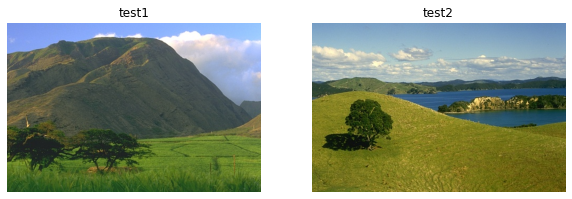

In [13]:
images = load_images([
                                "data/28083.jpg",
                                "data/36046.jpg"

])
plot(images, ["test1", "test2"])

In [14]:
print(images[0].getbands())

('R', 'G', 'B')


In [15]:
pic = images[0].resize( (400, 400) )
img = np.array(pic.getdata()).reshape(pic.size[0], pic.size[1], 3)

In [16]:
img[0][2]

array([121, 151, 237])

In [17]:
np.zeros( (4, 2, 3) )

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [18]:
img.shape

(400, 400, 3)

In [19]:
img[0,2]

array([121, 151, 237])

In [20]:
Chambolle_Pock(img)

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
g = gradient_vh(1, 1, img, 400, 1)

In [ ]:
img2 = np.zeros( (400, 400, 2, 3) )

In [ ]:
img2[0,0] + g